In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SalaryData_Train(1).csv")
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(30161, 14)

In [5]:
df.duplicated().sum()

3258

In [6]:
df=df.drop_duplicates()
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


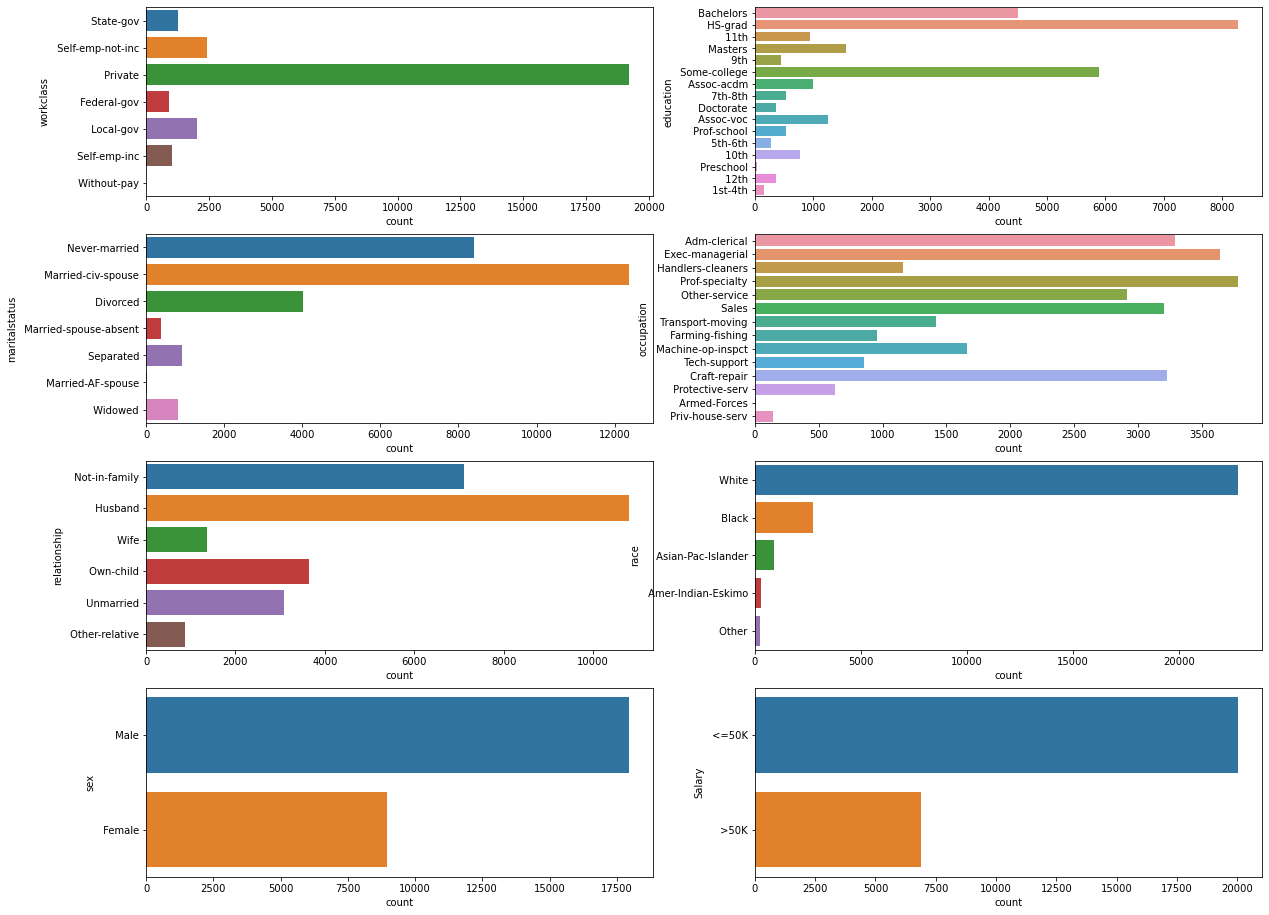

In [7]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=df, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=df, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=df, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=df, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=df, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=df, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=df, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=df, y='Salary')];

In [8]:
# Checking Correlation between numerical function

correlation2 = df.corr()
correlation2


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


<AxesSubplot:>

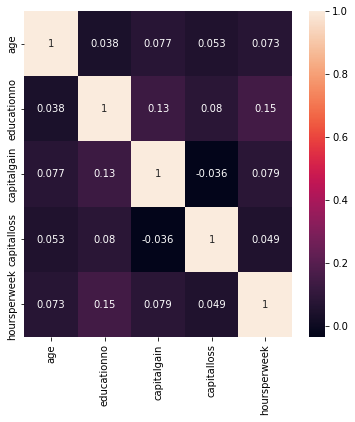

In [9]:
# creating heatmap by use of correlation

plt.figure(figsize=(6,6))
sns.heatmap(correlation2,annot=True)

<AxesSubplot:xlabel='age'>

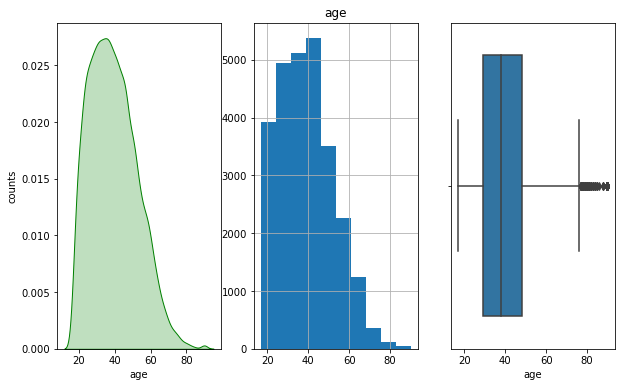

In [10]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(df['age'],shade=True,color='g');
plt.xlabel('age');
plt.ylabel('counts')
plt.subplot(1,3,2)
df['age'].hist()
plt.title("age")
plt.subplot(1,3,3)
sns.boxplot(x=df["age"])


<AxesSubplot:xlabel='educationno'>

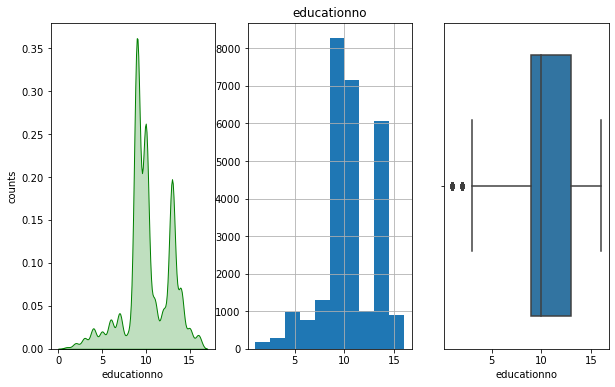

In [11]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(df['educationno'],shade=True,color='g');
plt.xlabel('educationno');
plt.ylabel('counts')
plt.subplot(1,3,2)
df['educationno'].hist()
plt.title("educationno")
plt.subplot(1,3,3)
sns.boxplot(x=df["educationno"])

<AxesSubplot:xlabel='capitalgain'>

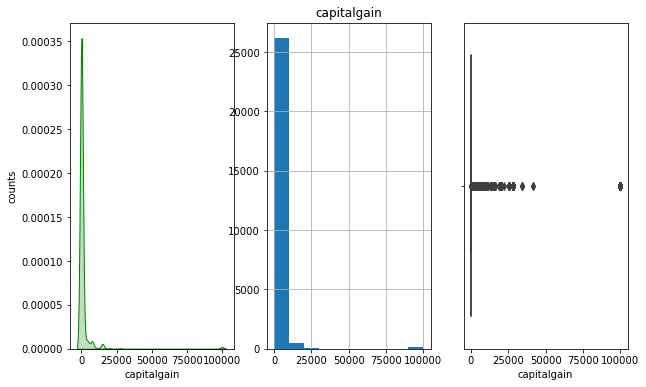

In [12]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(df['capitalgain'],shade=True,color='g');
plt.xlabel('capitalgain');
plt.ylabel('counts')
plt.subplot(1,3,2)
df['capitalgain'].hist()
plt.title("capitalgain")
plt.subplot(1,3,3)
sns.boxplot(x=df["capitalgain"])

<AxesSubplot:xlabel='capitalloss'>

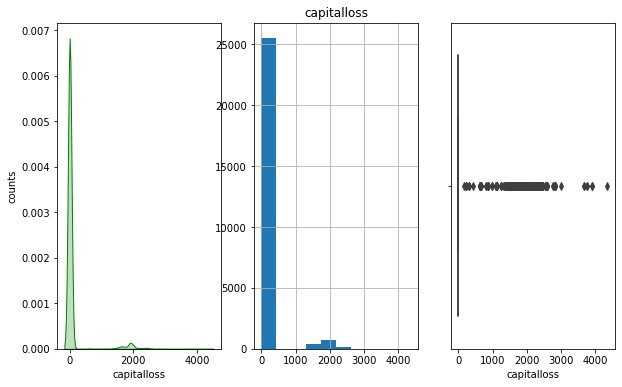

In [13]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(df['capitalloss'],shade=True,color='g');
plt.xlabel('capitalloss');
plt.ylabel('counts')
plt.subplot(1,3,2)
df['capitalloss'].hist()
plt.title("capitalloss")
plt.subplot(1,3,3)
sns.boxplot(x=df["capitalloss"])


<AxesSubplot:xlabel='hoursperweek'>

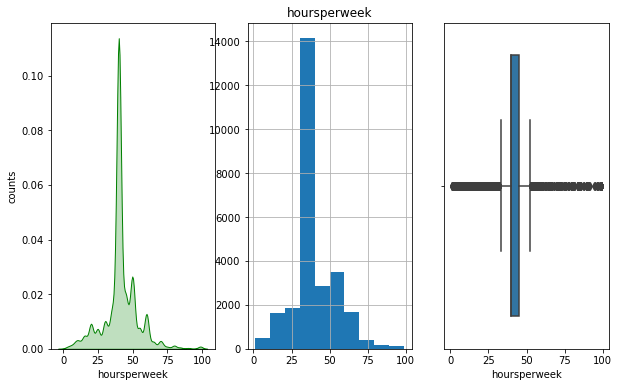

In [14]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(df['hoursperweek'],shade=True,color='g');
plt.xlabel('hoursperweek');
plt.ylabel('counts')
plt.subplot(1,3,2)
df['hoursperweek'].hist()
plt.title("hoursperweek")
plt.subplot(1,3,3)
sns.boxplot(x=df["hoursperweek"])

In [15]:
df['age'].unique(),df['age'].value_counts()

(array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
        54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
        36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
        90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
        83, 85, 82, 86], dtype=int64),
 31    769
 36    757
 33    748
 34    743
 37    740
      ... 
 82      7
 83      5
 88      3
 85      3
 86      1
 Name: age, Length: 72, dtype: int64)

In [16]:
df['workclass'].unique(),df['workclass'].value_counts()

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             19213
  Self-emp-not-inc     2431
  Local-gov            2014
  State-gov            1253
  Self-emp-inc         1049
  Federal-gov           929
  Without-pay            14
 Name: workclass, dtype: int64)

In [17]:
df['education'].unique(),df['education'].value_counts()

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th'], dtype=object),
  HS-grad         8268
  Some-college    5893
  Bachelors       4503
  Masters         1558
  Assoc-voc       1256
  Assoc-acdm       994
  11th             941
  10th             770
  7th-8th          541
  Prof-school      532
  9th              449
  Doctorate        364
  12th             358
  5th-6th          283
  1st-4th          149
  Preschool         44
 Name: education, dtype: int64)

In [18]:
df['maritalstatus'].unique(),df['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
  Married-civ-spouse       12371
  Never-married             8387
  Divorced                  4009
  Separated                  928
  Widowed                    817
  Married-spouse-absent      370
  Married-AF-spouse           21
 Name: maritalstatus, dtype: int64)

In [19]:
df['occupation'].unique(),df['occupation'].value_counts()

(array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
  Prof-specialty       3783
  Exec-managerial      3646
  Adm-clerical         3291
  Craft-repair         3229
  Sales                3205
  Other-service        2914
  Machine-op-inspct    1665
  Transport-moving     1420
  Handlers-cleaners    1159
  Farming-fishing       957
  Tech-support          858
  Protective-serv       626
  Priv-house-serv       141
  Armed-Forces            9
 Name: occupation, dtype: int64)

In [20]:
df['relationship'].unique(),df['relationship'].value_counts()

(array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
        ' Other-relative'], dtype=object),
  Husband           10809
  Not-in-family      7115
  Own-child          3655
  Unmarried          3086
  Wife               1366
  Other-relative      872
 Name: relationship, dtype: int64)

In [21]:
df['race'].unique(),df['race'].value_counts()

(array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
        ' Other'], dtype=object),
  White                 22758
  Black                  2734
  Asian-Pac-Islander      894
  Amer-Indian-Eskimo      286
  Other                   231
 Name: race, dtype: int64)

In [22]:
df['native'].unique(),df['native'].value_counts()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary'], dtype=object),
  United-States                 24259
  Mexico                          600
  Philippines                     188
  Germany                         128
  Puerto-Rico                     109
  Canada                          107
  India                           100
  El-Salvador                     100
  Cuba                             92
  England                          86
  Jamaica       

In [23]:
df['Salary'].unique(),df['Salary'].value_counts()

(array([' <=50K', ' >50K'], dtype=object),
  <=50K    20023
  >50K      6880
 Name: Salary, dtype: int64)

In [24]:
label_encoder=preprocessing.LabelEncoder()
df['maritalstatus']=label_encoder.fit_transform(df['maritalstatus'])
df['age']=label_encoder.fit_transform(df['age'])
df['workclass']=label_encoder.fit_transform(df['workclass'])
df['education']=label_encoder.fit_transform(df['education'])
df['occupation']=label_encoder.fit_transform(df['occupation'])
df['relationship']=label_encoder.fit_transform(df['relationship'])
df['race']=label_encoder.fit_transform(df['race'])
df['sex']=label_encoder.fit_transform(df['sex'])
df['native']=label_encoder.fit_transform(df['native'])
df['Salary']=label_encoder.fit_transform(df['Salary'])

In [25]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,33,4,9,13,2,3,0,4,1,0,0,13,37,0
2,21,2,11,9,0,5,1,4,1,0,0,40,37,0
3,36,2,1,7,2,5,0,2,1,0,0,40,37,0
4,11,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,5,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,10,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,41,2,11,9,6,0,4,4,0,0,0,40,37,0


# Importing Test Dataset

In [26]:
df1=pd.read_csv("SalaryData_Test(1).csv")
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [27]:
df1.shape

(15060, 14)

In [28]:
df1.duplicated().sum()

930

In [29]:
df1=df1.drop_duplicates()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [30]:
# Checking Correlation between numerical function

correlation2 = df1.corr()
correlation2

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021979,0.076765,0.053172,0.088090
educationno,0.021979,1.000000,0.132346,0.085651,0.127779
capitalgain,0.076765,0.132346,1.000000,-0.033929,0.089512
capitalloss,0.053172,0.085651,-0.033929,1.000000,0.056353
hoursperweek,0.088090,0.127779,0.089512,0.056353,1.000000


<AxesSubplot:>

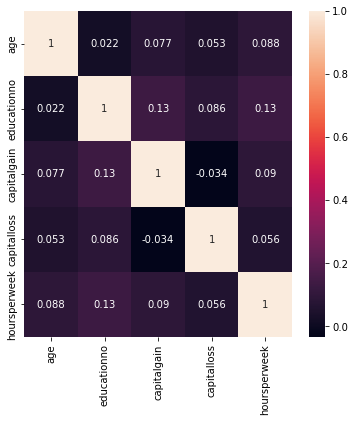

In [31]:
# creating heatmap by use of correlation

plt.figure(figsize=(6,6))
sns.heatmap(correlation2,annot=True)

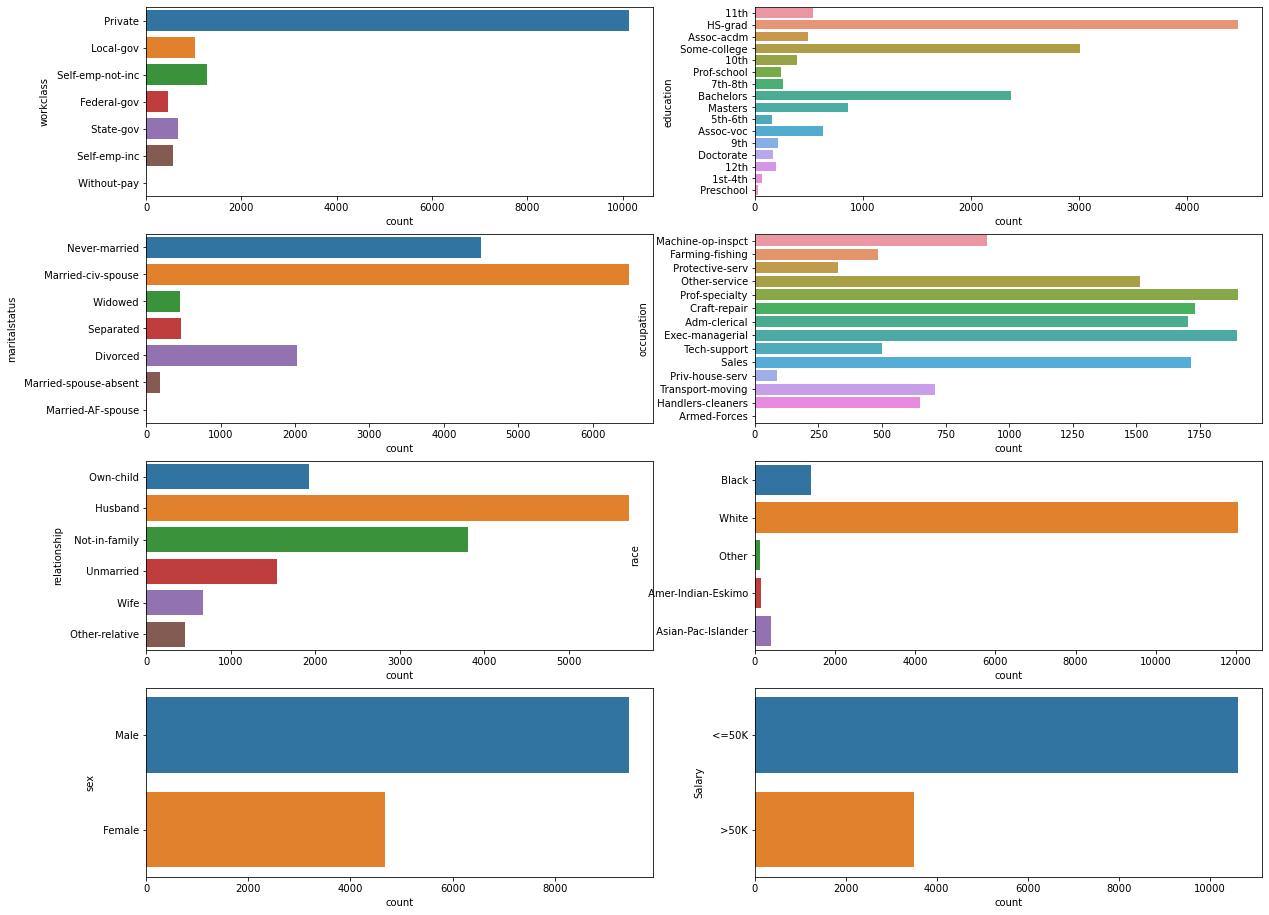

In [32]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=df1, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=df1, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=df1, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=df1, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=df1, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=df1, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=df1, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=df1, y='Salary')];

In [33]:
df1['age'].unique(),df1['age'].value_counts()

(array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
        23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
        69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
        64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
        83, 79, 88, 87, 84], dtype=int64),
 33    417
 35    415
 38    401
 31    393
 36    393
      ... 
 85      2
 88      2
 89      1
 87      1
 84      1
 Name: age, Length: 73, dtype: int64)

In [34]:
df1['workclass'].unique(),df1['workclass'].value_counts()

(array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
        ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             10138
  Self-emp-not-inc     1279
  Local-gov            1017
  State-gov             664
  Self-emp-inc          565
  Federal-gov           460
  Without-pay             7
 Name: workclass, dtype: int64)

In [35]:
df1['education'].unique(),df1['education'].value_counts()

(array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
        ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
        ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
        ' Preschool'], dtype=object),
  HS-grad         4473
  Some-college    3014
  Bachelors       2369
  Masters          864
  Assoc-voc        634
  11th             542
  Assoc-acdm       493
  10th             395
  7th-8th          265
  Prof-school      241
  9th              219
  12th             194
  Doctorate        168
  5th-6th          161
  1st-4th           71
  Preschool         27
 Name: education, dtype: int64)

In [36]:
df1['maritalstatus'].unique(),df1['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
        ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
       dtype=object),
  Married-civ-spouse       6490
  Never-married            4501
  Divorced                 2026
  Separated                 470
  Widowed                   450
  Married-spouse-absent     182
  Married-AF-spouse          11
 Name: maritalstatus, dtype: int64)

In [37]:
df1['occupation'].unique(),df1['occupation'].value_counts()

(array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
        ' Other-service', ' Prof-specialty', ' Craft-repair',
        ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
        ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
        ' Armed-Forces'], dtype=object),
  Prof-specialty       1899
  Exec-managerial      1897
  Craft-repair         1729
  Sales                1715
  Adm-clerical         1703
  Other-service        1513
  Machine-op-inspct     913
  Transport-moving      710
  Handlers-cleaners     648
  Tech-support          499
  Farming-fishing       484
  Protective-serv       326
  Priv-house-serv        89
  Armed-Forces            5
 Name: occupation, dtype: int64)

In [38]:
df1['relationship'].unique(),df1['relationship'].value_counts()

(array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
        ' Other-relative'], dtype=object),
  Husband           5714
  Not-in-family     3813
  Own-child         1928
  Unmarried         1543
  Wife               674
  Other-relative     458
 Name: relationship, dtype: int64)

In [39]:
df1['race'].unique(),df1['race'].value_counts()

(array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
        ' Asian-Pac-Islander'], dtype=object),
  White                 12051
  Black                  1400
  Asian-Pac-Islander      408
  Amer-Indian-Eskimo      149
  Other                   122
 Name: race, dtype: int64)

In [40]:
df1['native'].unique(),df1['native'].value_counts()

(array([' United-States', ' Peru', ' Guatemala', ' Mexico',
        ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
        ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
        ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
        ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
        ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
        ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
        ' Hong', ' Greece', ' Trinadad&Tobago',
        ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object),
  United-States                 12859
  Mexico                          292
  Philippines                      95
  Puerto-Rico                      66
  Germany                          65
  Canada                           56
  El-Salvador                      47
  India                            47
  China                            45
  Cuba                             41
  England       

In [41]:
df1['Salary'].unique(),df1['Salary'].value_counts()

(array([' <=50K', ' >50K'], dtype=object),
  <=50K    10620
  >50K      3510
 Name: Salary, dtype: int64)

In [42]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [43]:
for i in columns:
 df1[i]=label_encoder.fit_transform(df1[i])
 df1   

In [44]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# Performing Suport Vector Machine

In [45]:
x_train=df.iloc[:,0:13]
y_train=df['Salary']
x_test=df1.iloc[:,0:13]
y_test=df1['Salary']

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((26903, 13), (14130, 13), (26903,), (14130,))

In [47]:
clf=SVC()

parameters={'kernel':[ 'rbf'],
           'gamma':[0.001],
           'C':[0.1]}

gsv=GridSearchCV(clf , param_grid=parameters , cv=10)

gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [0.001], 'kernel': ['rbf']})

In [48]:
gsv.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

In [49]:
gsv.best_score_

0.819053999356246

In [50]:
#using c=0.1,gamma=0.001 we get 81% accuracy
#c=0.01,gamma=0.1 74% accuracys

In [51]:
model=SVC(C=0.1,gamma=0.001)
model.fit(x_train,y_train)

SVC(C=0.1, gamma=0.001)

In [52]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
acc=accuracy_score(y_test,y_pred) * 100
print(acc)

81.93913658881812


In [54]:
confusion_matrix(y_test, y_pred)

array([[10566,    54],
       [ 2498,  1012]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     10620
           1       0.95      0.29      0.44      3510

    accuracy                           0.82     14130
   macro avg       0.88      0.64      0.67     14130
weighted avg       0.84      0.82      0.78     14130

